[[ 5.  3.  4. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  5.  0. ...,  0.  0.  0.]]


-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------
-------


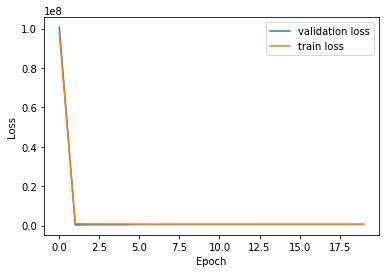

In [1]:
import math
import numpy as np
import re
import matplotlib.pyplot as plt

def loadMovieData(filename):
    data= np.zeros((943, 1682))
    for line in open(filename, 'r'):
        (user, movie, rating, ts) = re.split('	|	|	', line)
        #data.setdefault(user, 0)
        data[(int)(user)-1][(int)(movie)-1] = (int)(rating)
    return data

#读取数据
R_train = np.array(loadMovieData('u1.base'))
R_test = np.array(loadMovieData('u1.test'))

#初始化超参数
max_epoch = 20
m, n = R_train.shape
k = 8
lamda = 0.0001


eps = 0.1
I = np.eye(k)

#根据X,Y,R,计算Loss
def get_loss(X, Y, R):
    loss = 0
    print("-------")
    for u in range(m):
        for i in range(n):
            loss += (R[u][i] - X[u].dot(Y.T[i]))**2 + lamda * (np.dot(X[u], X[u]) + np.dot(Y.T[i], Y.T[i]))
    return loss

#根据均方根误差，判断是否满足结束训练的要求
def is_ok(X, Y, R):
    R_tem = np.dot(X, Y)
    s = 0
    for u in range(m):
        for i in range(n):
            s += (R_tem[u][i] - R[u][i])*(R_tem[u][i] - R[u][i])
    s /= (m*n)
    #print(s)
    return math.sqrt(s) < eps
    

# 训练过程，ALS主过程
def train(X, Y, R_train, R_test, loss_train, loss_test, epochs):
    flag = 1
    epoch = 0
    while not is_ok(X, Y, R_train):
        
        #添加画图数据
        loss_train.append(get_loss(X, Y, R_train))
        loss_test.append(get_loss(X, Y, R_test))
        epochs.append(epoch)
        epoch += 1

        if epoch >= max_epoch: break
        #交替固定X,Y，更新Y,X
        if flag == 1:
            for u in range(m):
                X[u] = np.linalg.inv((np.dot(Y, Y.T) + lamda * I)).dot(Y).dot(R_train[u])
        else :
            for i in range(n):
                Y.T[i] = np.linalg.inv((np.dot(X.T, X) + lamda * I)).dot(X.T).dot(R_train.T[i])
        flag *= -1




#画图列表的初始化，epochs存迭代次数，loss_train为训练集Loss，loss_test为验证集Loss
epochs = []
loss_train = []
loss_test = []
X = np.ones(shape=[m, k])
Y = np.ones(shape=[k, n])

#训练开始
train(X, Y, R_train, R_test, loss_train, loss_test, epochs)

#显示训练集和验证集的Loss随迭代次数增加而变化的图形
plt.plot(epochs, loss_test, label='validation loss')
plt.plot(epochs, loss_train, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()